# TEST 1

In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.4.1


In [19]:
mnist = tf.keras.datasets.fashion_mnist

In [26]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

In [27]:
training_images = training_images/255.0
test_images = test_images/255.0

In [28]:
test_images

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [29]:
model = tf.keras.models.Sequential([
                        tf.keras.layers.Flatten(),
                        tf.keras.layers.Dense(128, activation = tf.nn.relu),
                        tf.keras.layers.Dense(10, activation = tf.nn.softmax)    
])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(training_images, training_labels, epochs = 5)
test_loss = model.evaluate(test_images, test_labels)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6171 - accuracy: 0.7834
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3907 - accuracy: 0.8600
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3407 - accuracy: 0.8758
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3055 - accuracy: 0.8882
Epoch 5/5
313/313 [==============================] - 0s 831us/step - loss: 0.3499 - accuracy: 0.8735


# TEST 2

In [30]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

In [31]:
training_images = training_images.reshape(60000, 28, 28, 1)
training_images = training_images/255.0

In [32]:
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images/255.0

In [34]:
model = tf.keras.models.Sequential([
          tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
          tf.keras.layers.MaxPooling2D(2, 2),
          tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
          tf.keras.layers.MaxPooling2D(2,2),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(128, activation='relu'),
          tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_15 (Dense)             (None, 10)               

In [37]:
model.fit(training_images, training_labels, epochs=7)
test_loss = model.evaluate(test_images, test_labels)

Epoch 1/7
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1641 - accuracy: 0.9380
Epoch 2/7
1875/1875 [==============================] - 40s 21ms/step - loss: 0.1407 - accuracy: 0.9471
Epoch 3/7
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1265 - accuracy: 0.9521
Epoch 4/7
1875/1875 [==============================] - 40s 21ms/step - loss: 0.1109 - accuracy: 0.9583
Epoch 5/7
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0950 - accuracy: 0.96420s - loss: 0.0
Epoch 6/7
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0854 - accuracy: 0.9678
Epoch 7/7
313/313 [==============================] - 2s 7ms/step - loss: 0.3434 - accuracy: 0.9116


# TEST 3

In [42]:
test_labels[:100]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 5,
       7, 9, 1, 4, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 3, 7,
       6, 7, 2, 1, 2, 2, 4, 4, 5, 8, 2, 2, 8, 4, 8, 0, 7, 7, 8, 5, 1, 1,
       2, 3, 9, 8, 7, 0, 2, 6, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2,
       0, 6, 5, 3, 6, 7, 1, 8, 0, 1, 4, 2], dtype=uint8)

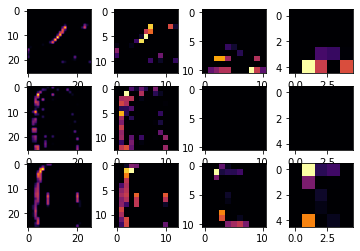

In [45]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
    f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[0,x].grid(False)
    f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[1,x].grid(False)
    f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[2,x].grid(False)

# TEST 4

In [46]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

2.4.1
Epoch 1/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2981 - accuracy: 0.9121
Epoch 2/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0584 - accuracy: 0.9832
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0333 - accuracy: 0.9897
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0202 - accuracy: 0.9936
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0135 - accuracy: 0.9960
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0094 - accuracy: 0.9970
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0067 - accuracy: 0.9979
Epoch 8/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0054 - accuracy: 0.9984
Epoch 9/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0035 - accuracy: 0.9990
Epoch 10/10
313/313 [==============================] - 1s 

# TEST 5

In [47]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [61]:
def house_model(x):
    xs = np.array([1.0, 2.0, 3.0, 4, 5, 6], dtype=float)
    ys = np.array([100, 150, 200, 250, 300, 350], dtype=float)
    model = tf.keras.Sequential([keras.layers.Dense(units = 1, input_shape = [1] )])
    model.compile(optimizer = 'sgd', loss = 'mean_squared_error')
    model.fit(xs,ys, epochs = 8)
    return model.predict(x)[0]

In [62]:
prediction = house_model([7])
print(prediction)

Epoch 1/8
1/1 [==============================] - 0s 184ms/step - loss: 60673.3477
Epoch 2/8
1/1 [==============================] - 0s 2ms/step - loss: 28213.7031
Epoch 3/8
1/1 [==============================] - 0s 999us/step - loss: 13189.4424
Epoch 4/8
1/1 [==============================] - 0s 2ms/step - loss: 6234.8071
Epoch 5/8
1/1 [==============================] - 0s 2ms/step - loss: 3015.0427
Epoch 6/8
1/1 [==============================] - 0s 3ms/step - loss: 1523.8973
Epoch 7/8
1/1 [==============================] - 0s 2ms/step - loss: 832.8143
Epoch 8/8
1/1 [==============================] - 0s 2ms/step - loss: 512.0316
[402.33942]


# TEST 6

In [70]:
import tensorflow as tf
from os import path, getcwd, chdir
path = f"C:/Users/DELL-POJ/Documents/Iykra/SaidML/TensorFlow/TensorFlow-Developer-Professional/mnist.npz"
def train_mnist():
    class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('accuracy')>0.99):
                print("\nReached 99% accuracy so cancelling training!")
                self.model.stop_training = True

    mnist = tf.keras.datasets.mnist

    (x_train, y_train),(x_test, y_test) = mnist.load_data(path=path)
    x_train, x_test = x_train / 255.0, x_test / 255.0
    callbacks = myCallback()
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(512, activation=tf.nn.relu),
        tf.keras.layers.Dense(512, activation=tf.nn.softmax)
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])
    return history.epoch, history.history['accuracy'][-1]

In [71]:
train_mnist()

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4675 - accuracy: 0.8864
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0907 - accuracy: 0.9725
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0535 - accuracy: 0.9843
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0366 - accuracy: 0.9878
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0262 - accuracy: 0.9916

Reached 99% accuracy so cancelling training!


([0, 1, 2, 3, 4], 0.9906166791915894)

# TEST 7

In [73]:
import tensorflow as tf
import os
import zipfile
from os import path, getcwd, chdir

path = f"C:/Users/DELL-POJ/Documents/Iykra/SaidML/TensorFlow/TensorFlow-Developer-Professional/happy-or-sad.zip"

zip_ref = zipfile.ZipFile(path, 'r')
zip_ref.extractall("/tmp/h-or-s")
zip_ref.close()

In [76]:
# GRADED FUNCTION: train_happy_sad_model
def train_happy_sad_model():
    DESIRED_ACCURACY = 0.999

    class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('acc') > DESIRED_ACCURACY):
                print("\nReached 99.9% accuracy so cancelling training!")
                self.model.stop_training = True


    callbacks = myCallback()
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    from tensorflow.keras.optimizers import RMSprop

    model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=0.001), metrics=['acc'])
        

    from tensorflow.keras.preprocessing.image import ImageDataGenerator

    train_datagen = ImageDataGenerator(rescale=1/255.0)

    train_generator = train_datagen.flow_from_directory(
        '/tmp/h-or-s/', 
        target_size=(150,150), 
        batch_size=10, 
        class_mode='binary')    

    history = model.fit_generator(
        train_generator,
        steps_per_epoch=8,  
        epochs=15,
        verbose=1, 
        callbacks=[callbacks])
    return history.history['acc'][-1]

In [77]:
train_happy_sad_model()

Found 80 images belonging to 2 classes.
Epoch 1/15
8/8 [==============================] - 1s 99ms/step - loss: 4.4010 - acc: 0.6144
Epoch 2/15
8/8 [==============================] - 1s 99ms/step - loss: 0.8688 - acc: 0.5942
Epoch 3/15
8/8 [==============================] - 1s 98ms/step - loss: 0.6186 - acc: 0.6220
Epoch 4/15
8/8 [==============================] - 1s 99ms/step - loss: 0.3308 - acc: 0.9084
Epoch 5/15
8/8 [==============================] - 1s 100ms/step - loss: 0.3585 - acc: 0.7979
Epoch 6/15
8/8 [==============================] - 1s 98ms/step - loss: 0.2141 - acc: 0.9329
Epoch 7/15
8/8 [==============================] - 1s 100ms/step - loss: 0.1785 - acc: 0.9031
Epoch 8/15
8/8 [==============================] - 1s 107ms/step - loss: 0.1844 - acc: 0.9386
Epoch 9/15
8/8 [==============================] - 1s 105ms/step - loss: 0.1658 - acc: 0.9031
Epoch 10/15
8/8 [==============================] - 1s 109ms/step - loss: 0.0314 - acc: 0.9888
Epoch 11/15
8/8 [=================

1.0